In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение
Генерация 1000 случайных величин с $ \lambda $ = 1.

In [2]:
my_lambda = 1
exp_rv = sts.expon(my_lambda)
exp_array = exp_rv.rvs(size=1000)
plt.plot()

Гистограмма выборки:

Text(0, 0.5, '$pdf$')

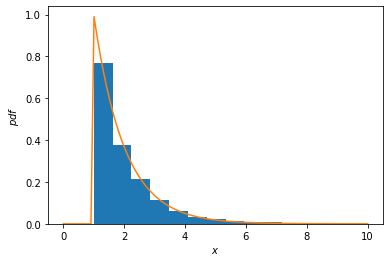

In [8]:
plt.hist(exp_array, density=True) # использую density вместо normed
x = np.linspace(0, 10, 100)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf)
plt.xlabel('$x$')
plt.ylabel('$pdf$')

Заполнение массивов выборочными средними в зависимости от объёма выборки. Построение гистограмм. Построение плотностей нормального распределения.

Объём выборки: 5 
Дисперсия, поделённая на объём выборки: 0.2
Объём выборки: 10 
Дисперсия, поделённая на объём выборки: 0.1
Объём выборки: 50 
Дисперсия, поделённая на объём выборки: 0.02


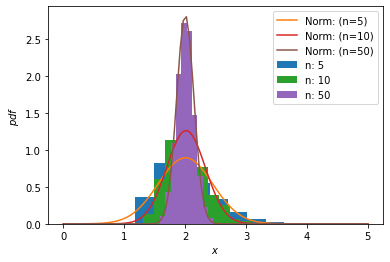

In [12]:
import math
n = [5, 10, 50]
samples = np.array([np.zeros(1000), np.zeros(1000), np.zeros(1000)])
for i in range(len(n)):
    for j in range(1000):
        temp_exp_array = exp_rv.rvs(size=n[i])
        samples[i][j] = temp_exp_array.mean()
    plt.hist(samples[i], density=True, label="n: " + str(n[i]))
    
    mu = samples[i].mean()
    sigma = math.sqrt(1 / (my_lambda ** 2) / n[i])
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 5, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="Norm: (n=" + str(n[i]) + ")")
    print("Объём выборки:", n[i], "\nДисперсия, поделённая на объём выборки:", 1 / (my_lambda ** 2) / n[i])
    plt.xlabel('$x$')
    plt.ylabel('$pdf$')
    plt.legend()

# Вывод:
Чем больше объём выборки, тем выше точность аппроксимации, а центральная предельная теорема подтверждает описание нормального распределения для выборочных средних экспоненциального распределения.